In [15]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

np.random.seed(0)
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')

In [16]:
file = open("data.csv", "r")
df = pd.read_csv(file)
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [17]:
features = [
    "Winner",
    "R_Height_cms",
    "B_Height_cms",
    "R_Weight_lbs",
    "B_Weight_lbs",
    "R_Reach_cms",
    "B_Reach_cms",
    "R_age", 
    "B_age",
    "R_current_win_streak",
    "B_current_win_streak",
    "R_wins",
    "B_wins",
    "R_losses",
    "B_losses"
]

new_df = df[features]
new_df.head()

,Winner,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age,R_current_win_streak,B_current_win_streak,R_wins,B_wins,R_losses,B_losses
0,Red,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0,1,0,1,1,0,1
1,Red,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0,2,2,4,2,2,0
2,Red,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0,3,0,4,0,3,0
3,Blue,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0,0,0,0,0,0,0
4,Blue,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0,2,3,5,4,6,1


In [18]:
new_df = new_df.dropna()
new_df.shape

(4954, 15)

In [19]:
new_df['height_diff'] = new_df['R_Height_cms'] - new_df['B_Height_cms']
new_df['weight_diff'] = new_df['R_Weight_lbs'] - new_df['B_Weight_lbs']
new_df['reach_diff'] = new_df['R_Reach_cms'] - new_df['B_Reach_cms']
new_df['age_diff'] = new_df['R_age'] - new_df['B_age']
new_df['win_streak_diff'] = new_df['R_current_win_streak'] - new_df['B_current_win_streak']
new_df['R_win_diff'] = new_df['R_wins'] - new_df['R_losses']
new_df['B_win_diff'] = new_df['B_wins'] - new_df['B_losses']

In [20]:
new_df.head()

,Winner,R_Height_cms,B_Height_cms,R_Weight_lbs,B_Weight_lbs,R_Reach_cms,B_Reach_cms,R_age,B_age,R_current_win_streak,...,B_wins,R_losses,B_losses,height_diff,weight_diff,reach_diff,age_diff,win_streak_diff,R_win_diff,B_win_diff
0,Red,170.18,165.10,135.0,135.0,177.80,170.18,27.0,31.0,1,...,1,0,1,5.08,0.0,7.62,-4.0,1,1,0
1,Red,182.88,187.96,185.0,205.0,187.96,193.04,28.0,32.0,2,...,2,2,0,-5.08,-20.0,-5.08,-4.0,0,2,2
2,Red,187.96,187.96,264.0,241.0,190.50,190.50,28.0,32.0,3,...,0,3,0,0.00,23.0,0.00,-4.0,3,1,0
3,Blue,160.02,152.40,115.0,115.0,160.02,154.94,25.0,28.0,0,...,0,0,0,7.62,0.0,5.08,-3.0,0,0,0
4,Blue,167.64,180.34,135.0,135.0,172.72,182.88,43.0,29.0,2,...,4,6,1,-12.70,0.0,-10.16,14.0,-1,-1,3


In [21]:
features = [
    "Winner",
    "height_diff",
    "weight_diff",
    "reach_diff",
    "age_diff",
    "win_streak_diff",
    "R_win_diff",
    "B_win_diff"
]
new_df = new_df[features]
new_df.head()

,Winner,height_diff,weight_diff,reach_diff,age_diff,win_streak_diff,R_win_diff,B_win_diff
0,Red,5.08,0.0,7.62,-4.0,1,1,0
1,Red,-5.08,-20.0,-5.08,-4.0,0,2,2
2,Red,0.00,23.0,0.00,-4.0,3,1,0
3,Blue,7.62,0.0,5.08,-3.0,0,0,0
4,Blue,-12.70,0.0,-10.16,14.0,-1,-1,3


# Logistic Regression

In [22]:
log_df = new_df

In [23]:
from sklearn.model_selection import train_test_split

y = new_df.loc[:, 'Winner']
X = new_df.loc[:, new_df.columns != "Winner"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X)

scaled_X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

l1_scores = []
l2_scores = []

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# produce scores
for c in C_values:
  model1 = LogisticRegression(
    C=c,
    penalty='l1',
    solver='liblinear'
  )
  model2 = LogisticRegression(
    C=c,
    penalty='l2',
    solver='liblinear'
  )
  model1.fit(X_train, y_train)
  model2.fit(X_train, y_train)
  l1_scores.append(model1.score(X_test, y_test))
  l2_scores.append(model2.score(X_test, y_test))

In [25]:
l1_scores

[0.5882946518668012,
 0.6397578203834511,
 0.644803229061554,
 0.6488395560040363,
 0.6488395560040363,
 0.6488395560040363,
 0.6488395560040363]

In [26]:
l2_scores

[0.6165489404641776,
 0.6387487386478304,
 0.6508577194752775,
 0.6488395560040363,
 0.6488395560040363,
 0.6488395560040363,
 0.6488395560040363]

# SVM

In [27]:
y = new_df.loc[:, 'Winner']
X = new_df.loc[:, new_df.columns != "Winner"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

scaled_X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from sklearn.svm import SVC

# model = SVC(kernel='linear')
# model.fit(X_train, y_train)

# print(f"Training Score: {model.score(X_train, y_train)}")
# print(f"Testing Score: {model.score(X_test, y_test)}")

In [29]:
# from sklearn.svm import SVC

# model = SVC(kernel='poly')
# model.fit(X_train, y_train)

# print(f"Training Score: {model.score(X_train, y_train)}")
# print(f"Testing Score: {model.score(X_test, y_test)}")

In [30]:
# from sklearn.svm import SVC

# model = SVC(kernel='rbf')
# model.fit(X_train, y_train)

# print(f"Training Score: {model.score(X_train, y_train)}")
# print(f"Testing Score: {model.score(X_test, y_test)}")

In [31]:
# for i in range(10):
#   model = SVC(kernel='poly', degree=i)
#   model.fit(X_train, y_train)
#   print(f"Testing Score with degree {i}: {model.score(X_test, y_test)}")
#   print(f"Training Score with degree {i}: {model.score(X_train, y_train)}")

Testing Score with degree 0: 0.6548940464177598
Training Score with degree 0: 0.6101438304314913
Testing Score with degree 1: 0.6548940464177598
Training Score with degree 1: 0.6101438304314913
Testing Score with degree 2: 0.6548940464177598
Training Score with degree 2: 0.6101438304314913
Testing Score with degree 3: 0.656912209889001
Training Score with degree 3: 0.6116578349735049
Testing Score with degree 4: 0.656912209889001
Training Score with degree 4: 0.6202371940449155
Testing Score with degree 5: 0.6508577194752775
Training Score with degree 5: 0.6303305576583397
Testing Score with degree 6: 0.6357214934409687
Training Score with degree 6: 0.6444612667171334
Testing Score with degree 7: 0.6387487386478304
Training Score with degree 7: 0.660105980317941
Testing Score with degree 8: 0.6316851664984864
Training Score with degree 8: 0.6701993439313652
Testing Score with degree 9: 0.6175580221997982
Training Score with degree 9: 0.6792833711834468


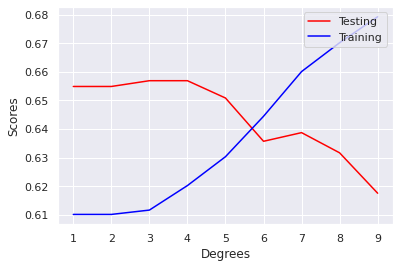

In [34]:
# polynomial scores

testing_scores = [
0.6548940464177598,
0.6548940464177598,
0.656912209889001,
0.656912209889001,
0.6508577194752775,
0.6357214934409687,
0.6387487386478304,
0.6316851664984864,
0.6175580221997982
]
training_scores = [
0.6101438304314913,
0.6101438304314913,
0.6116578349735049,
0.6202371940449155,
0.6303305576583397,
0.6444612667171334,
0.660105980317941,
0.6701993439313652,
0.6792833711834468
]

degrees = [1, 2, 3, 4, 5, 6, 7, 8, 9]

line1 = plt.plot(degrees, testing_scores, color='red', label='Testing')
line2 = plt.plot(degrees, training_scores, color='blue', label='Training')
plt.legend(loc="upper right")
plt.xlabel("Degrees")
plt.ylabel("Scores")
plt.show()


In [35]:
# C = [0.001, 0.01, 0.1, 1, 10, 100]
# for c in C:
#   model = SVC(kernel='rbf', C=c)
#   model.fit(X_train, y_train)

#   print(f"Training Score: {model.score(X_train, y_train)}")
#   print(f"Testing Score: {model.score(X_test, y_test)}")

Training Score: 0.6101438304314913
Testing Score: 0.6548940464177598
Training Score: 0.6101438304314913
Testing Score: 0.6548940464177598
Training Score: 0.6101438304314913
Testing Score: 0.6548940464177598
Training Score: 0.6227605349482715
Testing Score: 0.6609485368314834
Training Score: 0.6548069644208933
Testing Score: 0.6437941473259334
Training Score: 0.7050214483976786
Testing Score: 0.6094853683148335


# Neural Network


In [36]:
from sklearn.neural_network import MLPClassifier

In [ ]:
y = new_df.loc[:, 'Winner']
X = new_df.loc[:, new_df.columns != "Winner"]

scaler = StandardScaler()

scaler.fit(X)

scaled_X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = MLPClassifier(
    activation='relu'
)
model.fit(X_train, y_train)
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Testing Score: {model.score(X_test, y_test)}")

Training Score: 0.6643956598536462
Testing Score: 0.6347124117053481


In [38]:
model = MLPClassifier(
    activation='identity'
)
model.fit(X_train, y_train)
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Testing Score: {model.score(X_test, y_test)}")

Training Score: 0.6144335099671966
Testing Score: 0.6387487386478304


In [39]:
model = MLPClassifier(
    activation='logistic'
)
model.fit(X_train, y_train)
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Testing Score: {model.score(X_test, y_test)}")

Training Score: 0.6411809235427707
Testing Score: 0.6215943491422805


In [40]:
model = MLPClassifier(
    activation='tanh'
)
model.fit(X_train, y_train)
print(f"Training Score: {model.score(X_train, y_train)}")
print(f"Testing Score: {model.score(X_test, y_test)}")

Training Score: 0.6911430734292203
Testing Score: 0.5812310797174571


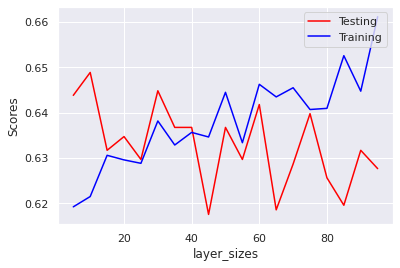

In [44]:
# # RELU
# training_scores = []
# testing_scores = []
# layer_sizes = [i for i in range(5, 100, 5)]

# for i in range(5, 100, 5):
#   model = MLPClassifier(
#     activation='relu',
#     hidden_layer_sizes=(i,)
#   )
#   model.fit(X_train, y_train)
#   training_scores.append(model.score(X_train, y_train))
#   testing_scores.append(model.score(X_test, y_test))

# line1 = plt.plot(layer_sizes, testing_scores, color='red', label='Testing')
# line2 = plt.plot(layer_sizes, training_scores, color='blue', label='Training')
# plt.legend(loc="upper right")
# plt.xlabel("layer_sizes")
# plt.ylabel("Scores")
# plt.show()


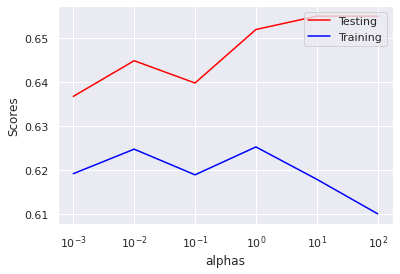

In [53]:
# alpha
training_scores = []
testing_scores = []
alphas = [0.001, 0.01, 0.1, 1, 10, 100]

for i in alphas:
  model = MLPClassifier(
    activation='relu',
    hidden_layer_sizes=(10,),
    alpha=i
  )
  model.fit(X_train, y_train)
  training_scores.append(model.score(X_train, y_train))
  testing_scores.append(model.score(X_test, y_test))

plt.xscale("log")

line1 = plt.plot(alphas, testing_scores, color='red', label='Testing')
line2 = plt.plot(alphas, training_scores, color='blue', label='Training')

plt.legend(loc="upper right")
plt.xlabel("alphas")
plt.ylabel("Scores")
plt.show()

In [55]:
print(max(testing_scores))
print(testing_scores.index(max(testing_scores)))


0.6548940464177598
4
